In [1]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [3]:
%matplotlib inline
np.set_printoptions(precision=5, suppress=True) # suppress scientific float notation

In [68]:
from itertools import chain, groupby
from quiz import models
from quiz.utils import MatrizesDeDadosBuilder

# Carrega as informações necessárias para construir as matrizes
votacoes = models.Votacao.objects.filter(data__range=['2013-01-01', '2016-12-31']).order_by('proposicao')
parlamentares = list(set(chain.from_iterable([[voto.parlamentar for voto in votacao.votos()] for votacao in votacoes])))
partidos = list(set([parlamentar.partido for parlamentar in parlamentares]))

In [4]:
# Gera uma matriz de votos por candidato (na ordem de parlamentares)
matriz = MatrizesDeDadosBuilder(votacoes, partidos, parlamentares).gera_matrizes()

In [5]:
# Processa a matriz via Numpy e rotaciona (transformando em uma matriz de votos por votação)
matriz = np.transpose(np.asmatrix(matriz))

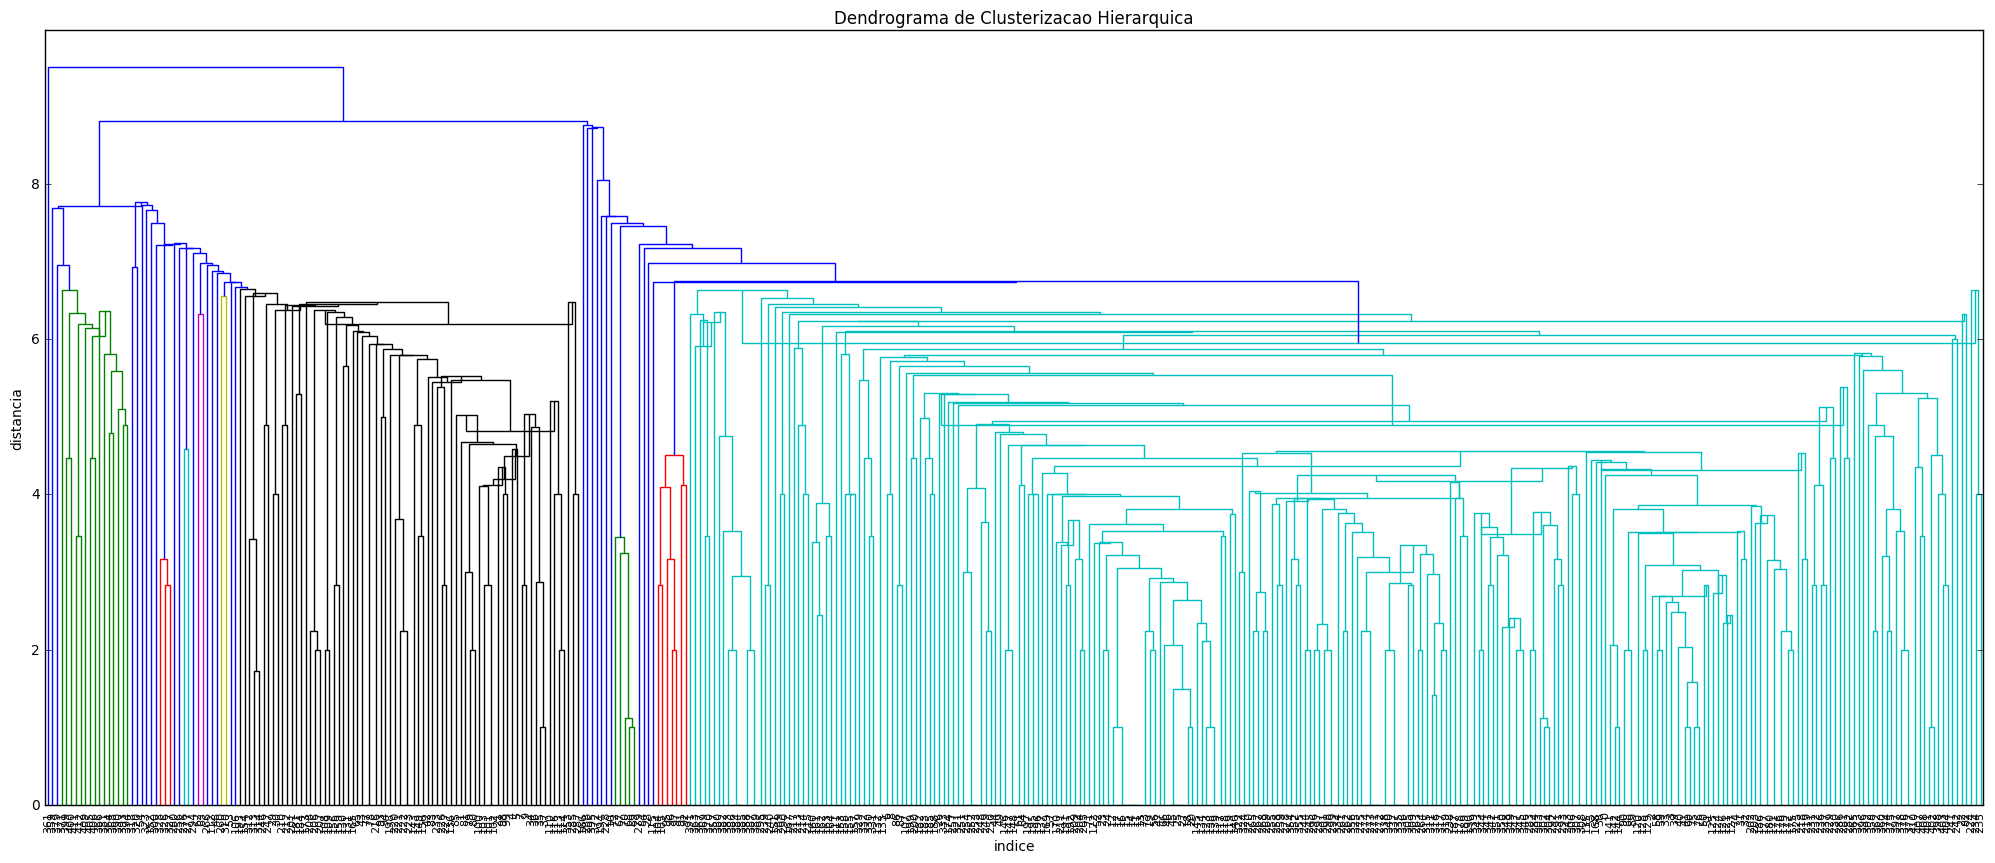

In [6]:
clusterizations = linkage(matriz, 'centroid')
plt.figure(figsize=(25, 10))
plt.title('Dendrograma de Clusterizacao Hierarquica')
plt.xlabel('indice')
plt.ylabel('distancia')
dendrogram(clusterizations, leaf_rotation=90, leaf_font_size=8)
plt.show()

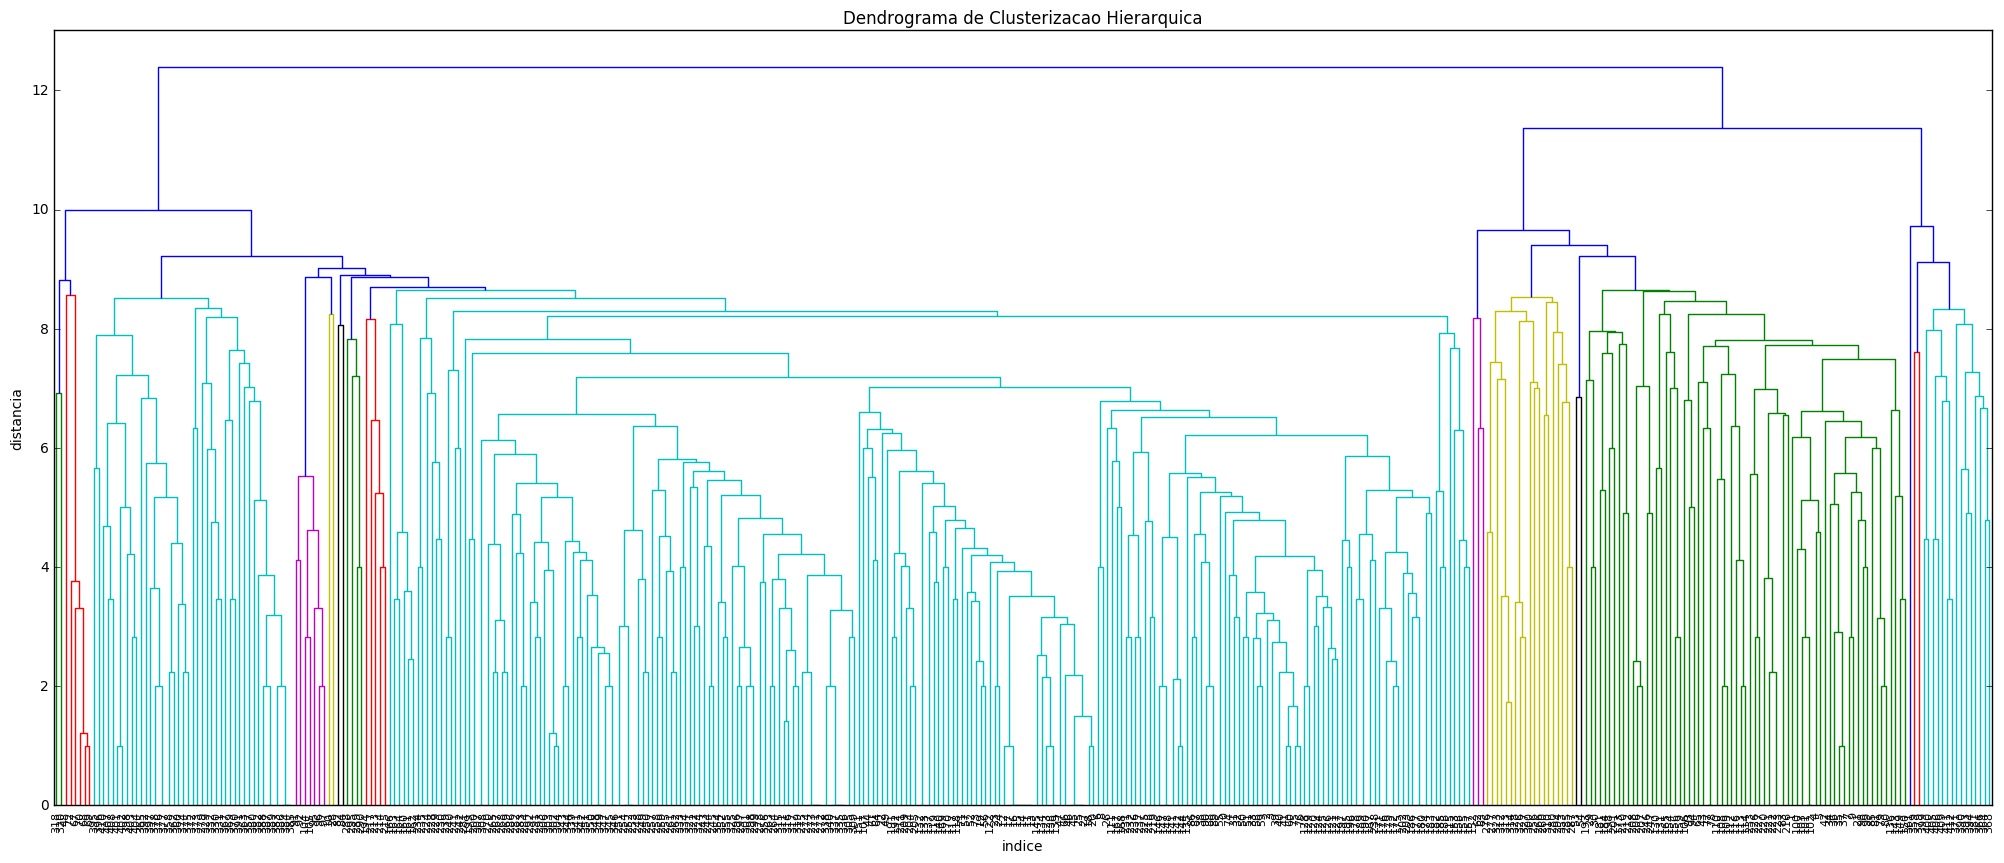

In [7]:
clusterizations = linkage(matriz, 'average')
plt.figure(figsize=(25, 10))
plt.title('Dendrograma de Clusterizacao Hierarquica')
plt.xlabel('indice')
plt.ylabel('distancia')
dendrogram(clusterizations, leaf_rotation=90, leaf_font_size=8)
plt.show()

In [8]:
# copiado sem-vergonha de https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

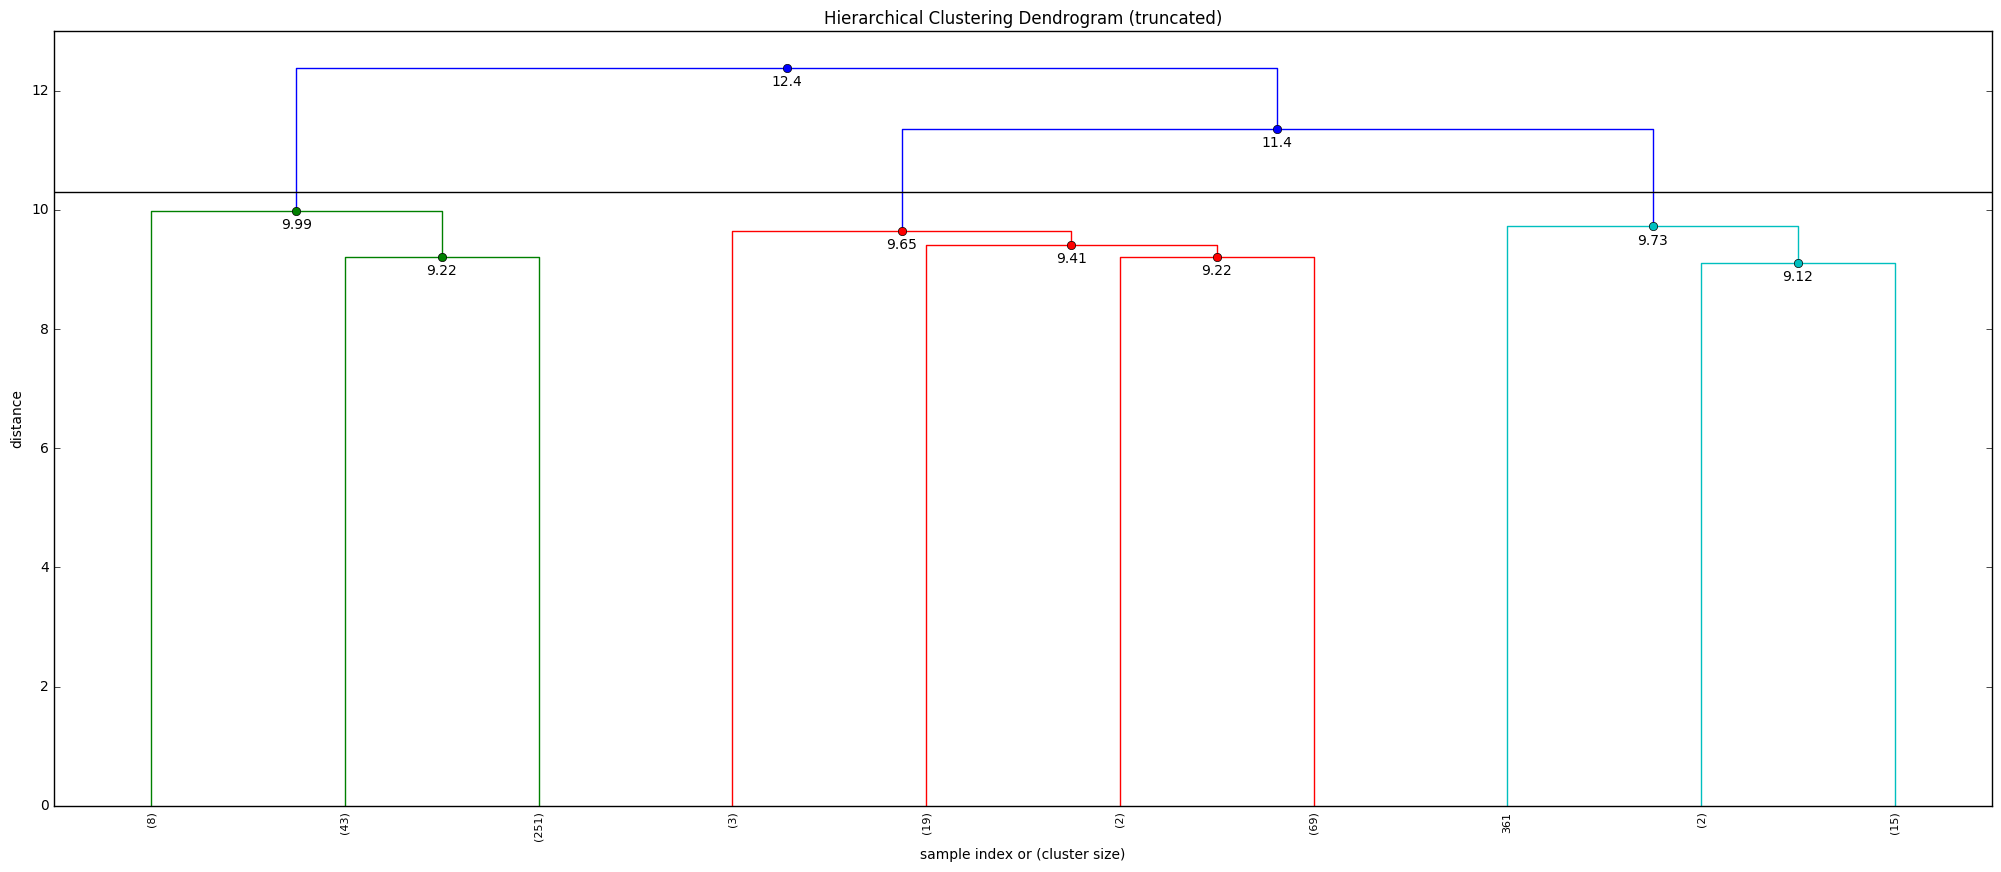

In [9]:
clusterizations = linkage(matriz, 'average')
plt.figure(figsize=(25, 10))
plt.title('Dendrograma de Clusterizacao Hierarquica')
plt.xlabel('indice')
plt.ylabel('distancia')
fancy_dendrogram(clusterizations, leaf_rotation=90, leaf_font_size=8,
           annotate_above=9, max_d=10.3,
           truncate_mode='lastp', p=10)
plt.show()

In [10]:
# testando o cophenet
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(clusterizations, pdist(matriz))

In [11]:
from scipy.cluster.hierarchy import fcluster

number_of_clusters = 6
cluster_results = fcluster(clusterizations, 6, criterion='maxclust')

clusters = [[votacoes[index] for index, cluster_id in enumerate(cluster_results) if cluster_id == n+1]
            for n in range(number_of_clusters)]

In [12]:
# Distingue as votações pela proposição
votacoes_groups = groupby(votacoes, lambda v: v.proposicao.id)
# len([k for k, g in votacoes_groups if len(list(g)) > 1])

In [76]:
def get_votacoes(proposicao): 
    return sorted([votacao for votacao in votacoes if votacao.proposicao.id_prop == proposicao],
                  key=lambda votacao: votacao.id)

In [84]:
def get_voto_parlamentar(votacao, parlamentar):
    votos = {voto.parlamentar.id: voto.opcao for voto in votacao.votos()}
    return votos.get(parlamentar.id)

In [92]:
pe_eles = ['PL-236-2016', 'PL-415-2012', 'PL-349-2014',
           'PL-529-2014', 'PL-65-2014', 'PL-209-2011',
           'PDL-6-2013', 'PL-254-2010', 'PL-236-2013']
votacoes_selecionadas = [get_votacoes(pe_ele)[-1] for pe_ele in pe_eles]

{p.nome: [get_voto_parlamentar(votacao, p) for votacao in votacoes_selecionadas]
 for p in parlamentares}

{u'ABOU ANNI': [None, u'SIM', None, None, None, None, u'SIM', u'SIM', None],
 u'ADILSON AMADEU': [u'SIM',
  u'SIM',
  u'SIM',
  u'SIM',
  None,
  u'SIM',
  u'SIM',
  None,
  u'SIM'],
 u'ADOLFO QUINTAS': [u'SIM', None, None, None, None, None, None, None, None],
 u'ALESSANDRO GUEDES': [None,
  u'SIM',
  u'SIM',
  None,
  None,
  None,
  u'NAO',
  u'SIM',
  u'SIM'],
 u'ALFREDINHO': [u'SIM',
  u'SIM',
  u'SIM',
  u'SIM',
  u'NAO',
  u'SIM',
  u'NAO',
  u'SIM',
  u'SIM'],
 u'ANDREA MATARAZZO': [None, None, None, None, None, None, None, None, None],
 u'ANIBAL DE FREITAS FILHO': [u'SIM',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 u'ANTONIO CARLOS RODRIGUES': [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 u'ANTONIO DONATO': [u'SIM',
  u'SIM',
  u'SIM',
  u'SIM',
  u'NAO',
  u'SIM',
  None,
  None,
  None],
 u'ARI FRIEDENBACH': [u'SIM', None, None, None, None, None, None, None, None],
 u'ARSELINO TATTO': [u'SIM',
  u'SIM',
  u'SIM',
  u'SIM',
  u

In [71]:
from collections import Counter
for votacao in get_votacoes('PL-236-2013'):
    contador = Counter([v.opcao for v in votacao.votos()])
    votos = ' '.join(['{} {}'.format(k, v) for k,v in contador.iteritems()])
    
    print 'Votação #{}'.format(votacao.id_vot) + ' ' + votacao.data.isoformat() + '\n'
    print votacao.proposicao.ementa + '\n'
    print votacao.descricao + '\n' 
    print votacao.resultado + ' ' + votos + '\n\n\n'

Votação #1363 2013-06-05

AUTORIZA O PODER EXECUTIVO A INSTITUIR SERVIÇO SOCIAL AUTÔNOMO DENOMINADO AGÊNCIA SÃO PAULO DE DESENVOLVIMENTO - ADE SAMPA; INSTITUI O PROGRAMA PARA A VALORIZAÇÃO DE INICIATIVAS TECNOLÓGICAS - VAI TEC, NO ÂMBITO DA ADE SAMPA; MODIFICA DISPOSITIVOS DA LEI Nº 14.517, DE 16 DE OUTUBRO DE 2007. 

Encerramento da discussão ao PL 236/2013 DO EXECUT... - APROVADO EM SEGUNDA DISCUSSÃO E VOTAÇÃO NA FORMA DO TEXTO ORIGINAL COM EMENDA Nº 14 DA LIDERANÇA DO GOVERNO.  O PROJETO VOLTARÁ PARA A COMISSÃO DE JUSTIÇA PARA ELABORAÇÃO DO PARECER DE REDAÇÃO FINAL.

Aprovado NAO 5 SIM 35



Votação #1362 2013-06-05

AUTORIZA O PODER EXECUTIVO A INSTITUIR SERVIÇO SOCIAL AUTÔNOMO DENOMINADO AGÊNCIA SÃO PAULO DE DESENVOLVIMENTO - ADE SAMPA; INSTITUI O PROGRAMA PARA A VALORIZAÇÃO DE INICIATIVAS TECNOLÓGICAS - VAI TEC, NO ÂMBITO DA ADE SAMPA; MODIFICA DISPOSITIVOS DA LEI Nº 14.517, DE 16 DE OUTUBRO DE 2007. 

PL 236 /2013, DO EXECUTIVO - APROVADO EM SEGUNDA DISCUSSÃO E VOTAÇÃO NA FORMA 

In [93]:
get_votacoes('PL-236-2016')

[<Votacao: [2016-06-15] PL 236 /2016 , do EXECUTIVO - >]

In [82]:
x.get?